# Milestone 2

## Nama  : Irvandhi Stanly Winata
## Batch : HCK - 013

**Objective and Background**

This project is intended to create a machine learning model to predict whether individuals might have brain stroke or not based on relevant features given in the dataset using k-Nearest Neighbors, Support Vector Machine, Decision Tree, Random Forest, and XGBoost models. Firstly, the data set will be explored in terms of descriptive analysis, visualizations, datatypes, shape, etc. Then, the data will be splitted into X_train, X_test, y_train, and y_test. Then, we will conduct feature engineering, which include handling outliers and missing values, feature selectionsm as well as data balancing. After that, we will build a pipeline for each models, which will include the scaling, encoding, and model definition using the default parameters. Then, the three models will be compared and evaluated using recall Score. Then, the best model with the better recall score and fit will be chosen. Furthermore, we will conduct hyperparameters tuning for the best algorithm to further enhance its performance. And lastly, the model will be tested in the inference notebook using a brand new data input and deployed using HuggingFace.

===========================================================================================================================

# Importing Necessary Libraries
Before we start the analysis, we have to import the necessary packages and libraries to assist our machine learning model creation.

In [1]:
#Libraries for dataframe handling, visualizations, and statistical analysis
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Libraries related to machine learning model
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from feature_engine.outliers import Winsorizer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTENC
from sklearn.model_selection import GridSearchCV

#Libraries for model evaluation
from sklearn.metrics import recall_score, classification_report, make_scorer

#Libraries for model saving
import pickle

# Data Loading, Basic Data Exploration, and Data Cleaning

The dataset containing the information about brain stroke patients was obtained from Kaggle (Source: https://www.kaggle.com/datasets/zzettrkalpakbal/full-filled-brain-stroke-dataset). The data was downloaded and the csv file is sucessfully loaded into this notebook. The first and last 10 rows of the dataset are shown below:

In [2]:
#Loading the dataset from .scv files and displaying the dataset
data_raw = pd.read_csv('P1M2_Irvandhi_stanly_dataset.csv')
data_raw.head(10)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
5,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
6,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
7,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1
8,Female,81.0,1,0,Yes,Private,Rural,80.43,29.7,never smoked,1
9,Female,61.0,0,1,Yes,Govt_job,Rural,120.46,36.8,smokes,1


In [3]:
data_raw.tail(10)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
4971,Male,37.00,0,0,Yes,Private,Rural,107.06,29.7,smokes,0
4972,Male,72.00,0,1,Yes,Private,Rural,238.27,30.7,smokes,0
4973,Male,1.32,0,0,No,children,Rural,107.02,18.8,Unknown,0
4974,Male,58.00,0,0,Yes,Govt_job,Urban,84.94,30.2,never smoked,0
4975,Male,31.00,0,0,No,Private,Urban,215.07,32.7,smokes,0
4976,Male,41.00,0,0,No,Private,Rural,70.15,29.8,formerly smoked,0
4977,Male,40.00,0,0,Yes,Private,Urban,191.15,31.1,smokes,0
4978,Female,45.00,1,0,Yes,Govt_job,Rural,95.02,31.8,smokes,0
4979,Male,40.00,0,0,Yes,Private,Rural,83.94,30.0,smokes,0
4980,Female,80.00,1,0,Yes,Private,Urban,83.75,29.1,never smoked,0


The shape of the dataset was observed, and we can see that this dataset has 11 columns and 4981 rows.

In [4]:
data_raw.shape

(4981, 11)

Copying the original data set into a new variable for exploratory and analysis purposes

In [5]:
df = data_raw.copy()

From the data_raw.info(), we can observe that the datatypes in this dataset are distributed into 3 float, 3 int, and 5 object columns. The overview of the data is shown below:



In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


Then, we analyze the central tendencies of the numerical columns to get an overview about their descriptive statistic and distributions. However, the skewness will be evaluated in the later sections

In [7]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000
mean,43.419859,0.096165,0.055210,105.943562,28.498173,0.049789
std,22.662755,0.294848,0.228412,45.075373,6.790464,0.217531
min,0.080000,0.000000,0.000000,55.120000,14.000000,0.000000
25%,25.000000,0.000000,0.000000,77.230000,23.700000,0.000000
50%,45.000000,0.000000,0.000000,91.850000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,113.860000,32.600000,0.000000
max,82.000000,1.000000,1.000000,271.740000,48.900000,1.000000


Then, the presence of missing values will be checked and it was found that there are no null values within this dataset

In [8]:
null_values = df.isnull()
null_count = null_values.sum()
print(null_count)

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


After that, we investigate the presence of duplicated rows. It was found that this dataset has no duplicated rows.

In [9]:
df.duplicated().sum()

0

## Data Imbalance

Lastly, we need to see the balance within the column 'stroke'. This information is important as it will determine the metrics that we are going to use for the model evaluations. It was found that the column stroke is extremely imbalance, as it has 4733 rows with 0 value and only 248 rows with a value of 1. Therefore, we will conduct data balancing in the later sections.

In [10]:
value_counts = df['stroke'].value_counts()

print("Value counts:")
print(value_counts)

Value counts:
stroke
0    4733
1     248
Name: count, dtype: int64


# Exploratory Data Analysis (EDA)

To further elevate our understanding about this data set, EDA using visualizations will be done below. To preserve the originality for further analysis, a copy of the original data set will be created as we might need to modify or create new columns in the dataframe.

In [11]:
# Creating another copy of the dataset for EDA as there will be alteration of columns

df_eda = df.copy()
df_eda

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
4976,Male,41.0,0,0,No,Private,Rural,70.15,29.8,formerly smoked,0
4977,Male,40.0,0,0,Yes,Private,Urban,191.15,31.1,smokes,0
4978,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,31.8,smokes,0
4979,Male,40.0,0,0,Yes,Private,Rural,83.94,30.0,smokes,0


### **The Percentage of Whether or Not An Individual Will Have Brain Stroke**


The pie chart below suggests that the majority of people that participate in the sampling ended up being healthy, while only 5% of the people actually have brain stroke We can observe the imbalance within our data in which the percentage of people that didn’t have stroke is way bigger than the one that got brain stroke.

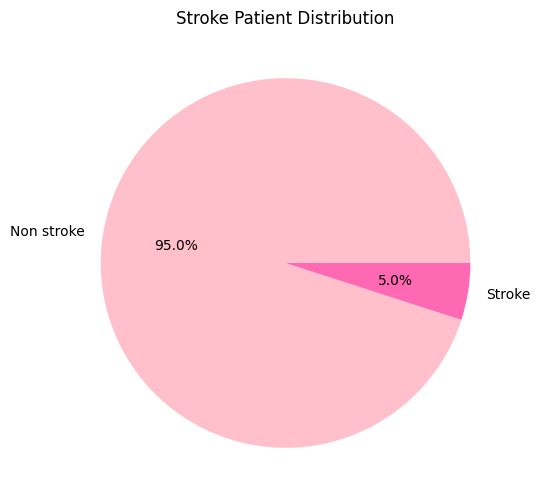

In [12]:
plt.figure(figsize=(6, 6))

stroke_colors = ['pink', 'hotpink']
stroke_count = df_eda['stroke'].value_counts()

labels = ['Non stroke', 'Stroke']
# Making pie chart
plt.pie(stroke_count, labels=labels, autopct='%1.1f%%', colors=stroke_colors)
plt.title('Stroke Patient Distribution')
plt.show()

### **Plotting Whether or Not Someone  Will Be Have Brain Stroke Based On Categorical Features**

It can be seen that there are no apparent trend observed in the bar graph as the number of healthy people dominated the sick people. However there are important key take away from these graphs

Although the number of people with stroke is smaller among the people with hypertension and heart diesease, we can see that the amount of people that did not get stroke in the hypertension and heart diesease class is also small. Indicating people with hypertension and heart diesease is more likely to get stroke.

As for the marital status, work type, and smoking status, the pattern is more apparent with people that have been married, working in a private sector, and a regular smoker tend to have strokes. As for the living area, there are no difference between rural and urban area. However, we need to conduct further analysis to determine which features will be included in our model in the feature selection section.

In [13]:
categorical_columns = ['gender', 'hypertension', 'heart_disease', 'ever_married',
                    'work_type', 'Residence_type', 'smoking_status']

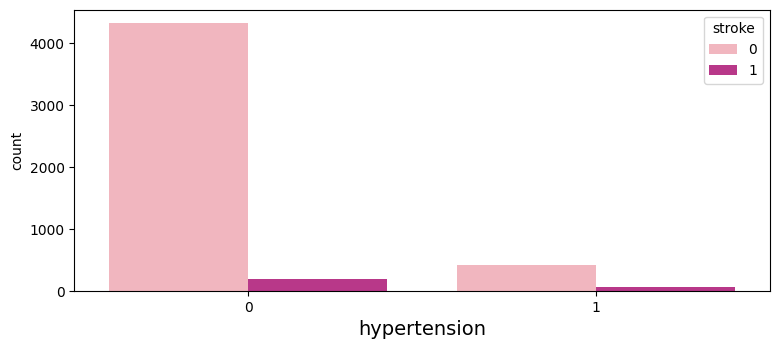

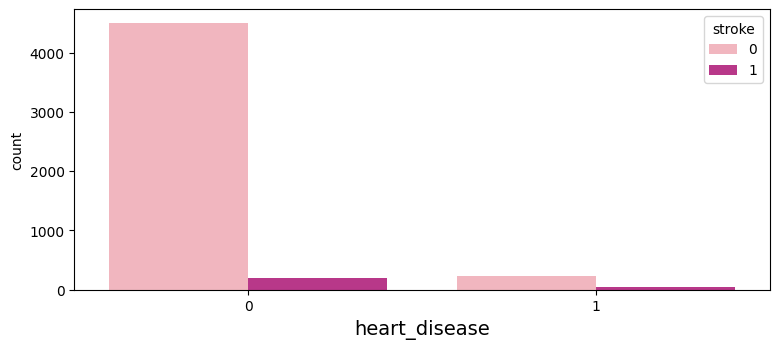

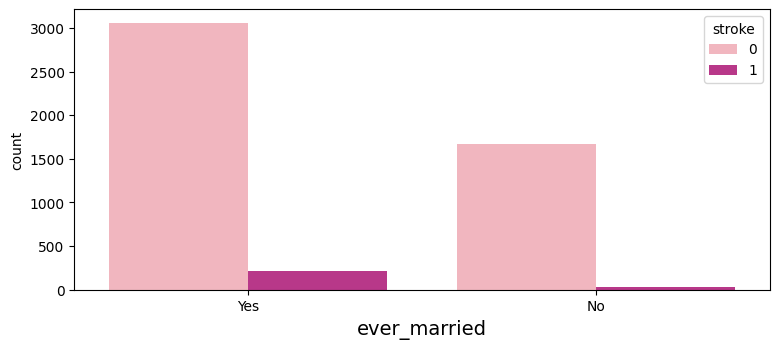

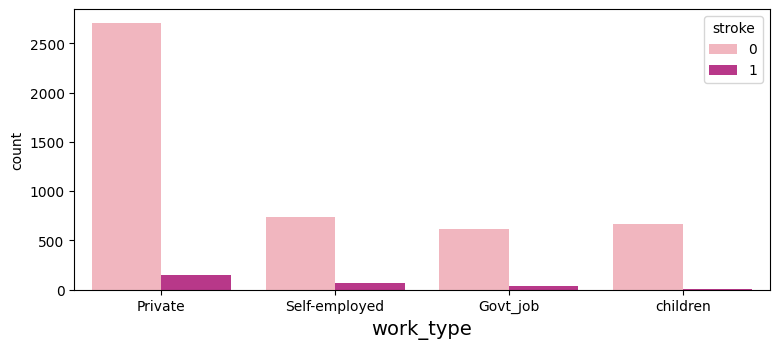

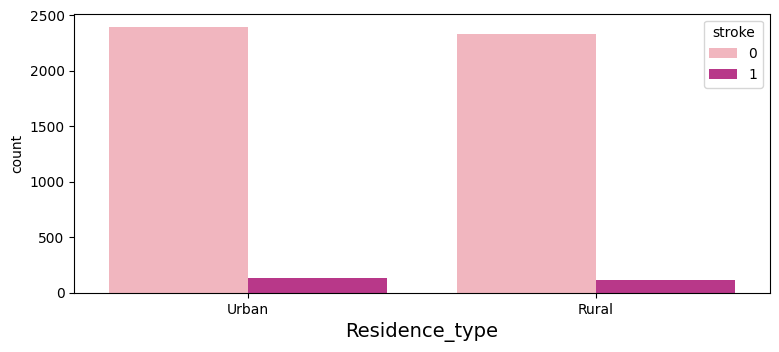

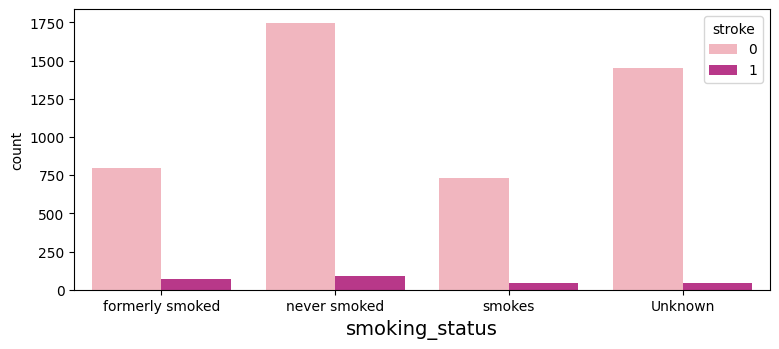

In [14]:
for i in categorical_columns[1:]: 
    plt.figure(figsize=(15,10))
    plt.subplot(3,2,1)
    sns.countplot(x=i ,hue='stroke', data=df_eda, palette='RdPu')
    plt.xlabel(i, fontsize=14)
    plt.tight_layout()
    plt.show()

In [15]:
#Defining a function to create histogram and box plot for certain variables
def diagnostic_plots(df, variable):
    # Define figure size
    plt.figure(figsize=(10, 6))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable], bins=30, color='hotpink')
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[variable], color='hotpink')
    plt.title('Boxplot')

    plt.show()

### **Observing Age's Distribution And Box Plot**

It can be seen from the visualization below that the distribution of the age column is normal. It generally has the same amount of low  and high value data, indicating a non-skewed distribution.

We can conlude that our data is mostly comprised of people with varying age, with slight peak at the age of 50 and 80. We can also observe the box plot and see that there are no outliers present within this column as it has normal distribution.

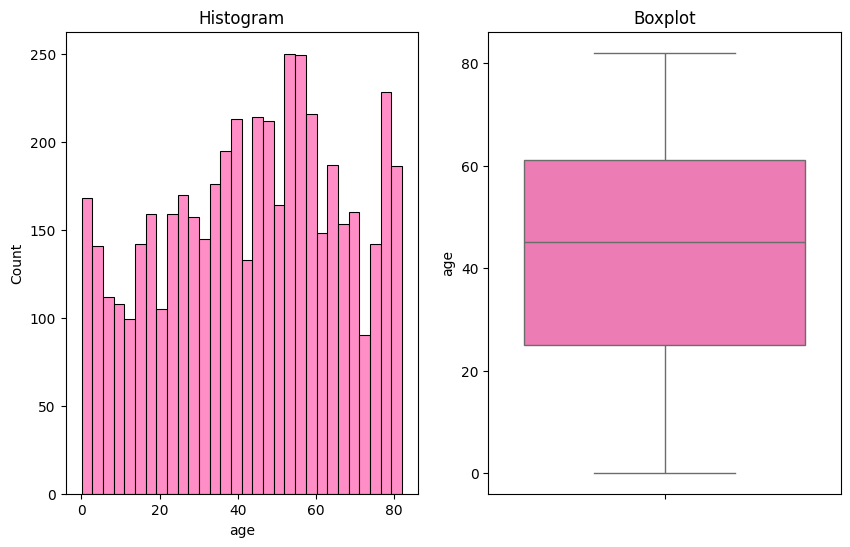

In [16]:
diagnostic_plots(df_eda, 'age')

### **Observing Average Glucose Level Distribution And Box Plot**

In contrast to the age column, it can be seen from the visualization below that the distribution of the average glucose level column is not normal. It has more low value data compared to high ones, indicating a positively skewed distribution. Moreover, the very low number of extremely high values are present, indicating potential outliets within the data.

This is because as mentioned before, our data is mostly comprised of people with low to normal blood sugar level. Blood sugar level is considered normal when the value is below 140 mg/dL, which align with the visualization as majority of people have blood sugar below that threshold, with some individuals having diabetes.

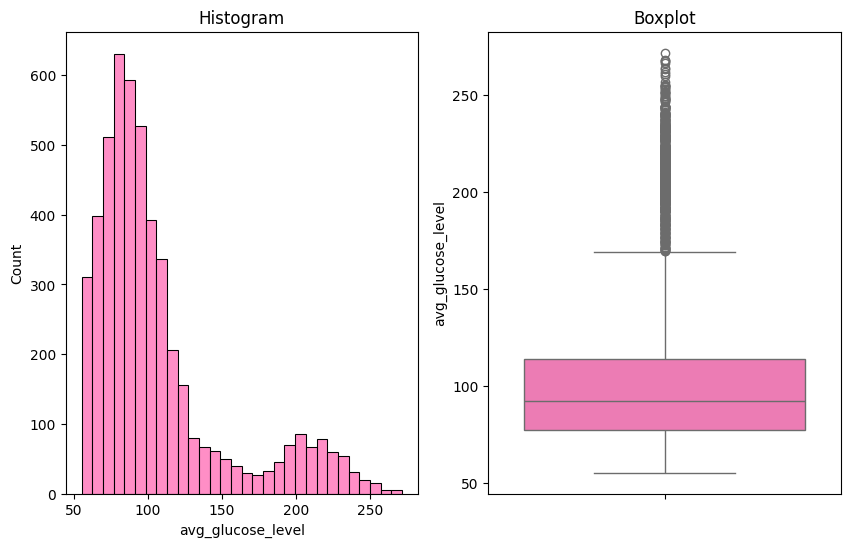

In [17]:
diagnostic_plots(df_eda, 'avg_glucose_level')

## **Plotting Age vs Average Glucose Level**


The graph demonstrated that generally, when someone is older than 50 years old, they are more prone to having brain stroke. High average blood glucose level also showed to correlate with more stroke cases, even though there are people with normal blood sugar who ended up having stroke. This finding is aligned with the basic knowledge that older people is more prone to stroke, however the importance of blood glucose level need to be analyzed further in feature selection

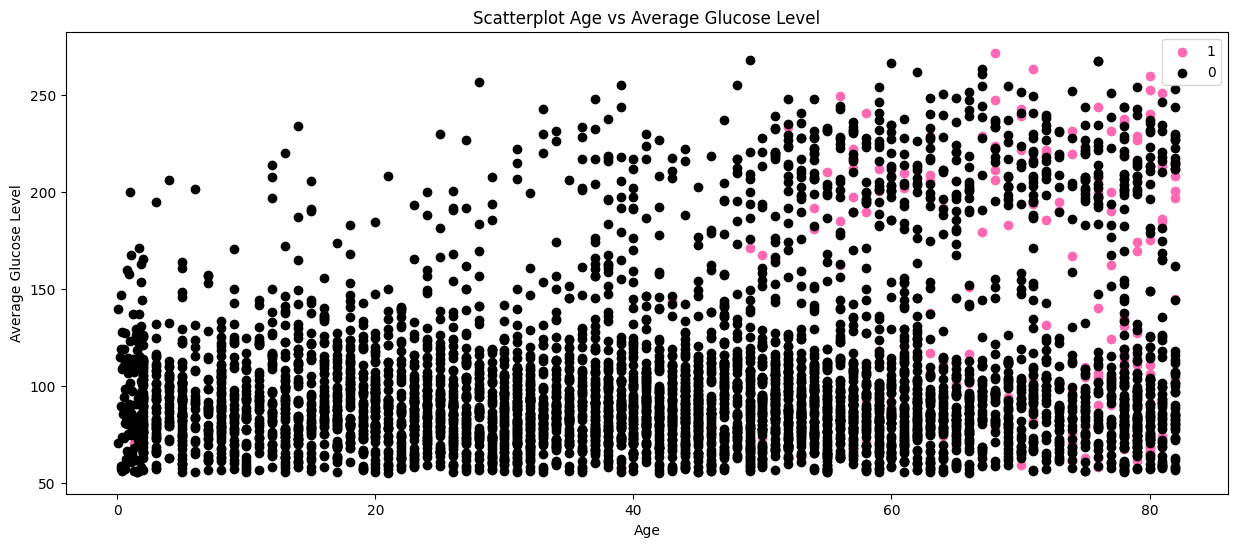

In [18]:
# Get unique values from the stroke column
strokes = df_eda["stroke"].unique()

# Create a scatter plot for each values from the stroke column
plt.figure(figsize=(15, 6))
for stroke in strokes:
    plt.scatter(df[df["stroke"] == stroke]["age"], 
                df[df["stroke"] == stroke]["avg_glucose_level"], 
                color='hotpink' if stroke == 1 else 'black',
                label=stroke)

plt.title('Scatterplot Age vs Average Glucose Level')
plt.xlabel('Age')
plt.ylabel('Average Glucose Level')
plt.legend()
plt.show()


## **Plotting Age VS BMI**


The graph showed that again, older people is more prone to stroke compared to younger people. However as for the bmi,  we can see that old people with various BMI can still happen to have brain stroke. This is because BMI is the ratio of body weight and height. Eventhough someone's obesity status may correlate with heart diseases, hypertension, and stroke itself, BMI does not really represents the health status of a person and a person's body fat might be a more accurate metric for this case. A tall people with terrible body composition (low muscle, high fat) might be shown to have a desirable BMI, eventhough the health status is not as good as what the BMI described to us.

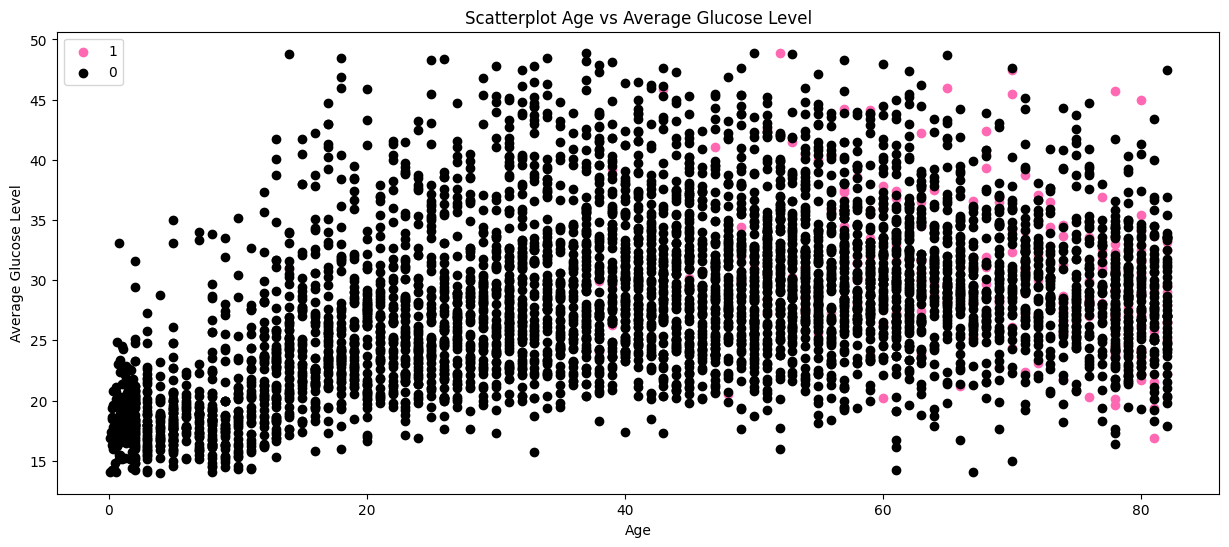

In [19]:
# Get unique values from the stroke column
strokes = df_eda["stroke"].unique()

# Create a scatter plot for each values from the stroke column
plt.figure(figsize=(15, 6))
for stroke in strokes:
    plt.scatter(df[df["stroke"] == stroke]["age"], 
                df[df["stroke"] == stroke]["bmi"], 
                color='hotpink' if stroke == 1 else 'black',
                label=stroke)

plt.title('Scatterplot Age vs Average Glucose Level')
plt.xlabel('Age')
plt.ylabel('Average Glucose Level')
plt.legend()
plt.show()


## **Relationship between Age and Marriage Status**


The graph validated our dataset does not contain errors in terms of age and martial status. This is important to check as we do not want individuals under the reproductive age to be classified as married. From the chart, we can see the marital status is always 'no' for child to teenager and starts to vary when the individuals being observed is older.

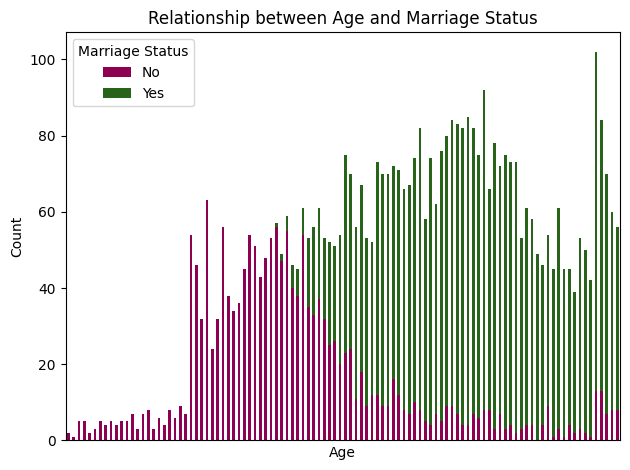

In [20]:
grouped_data = df_eda.groupby(['age', 'ever_married']).size().unstack(fill_value=0)

# Plot
# Plot
ax = grouped_data.plot(kind='bar', stacked=True, colormap='PiYG')
plt.title('Relationship between Age and Marriage Status')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Marriage Status')
ax.set_xticks([])
plt.tight_layout()
plt.show()

# Analyzing Whether The Columns With Integer And Float Data Types are Actually Numerical Columns Or Encoded Categorical Features

Despite having numerical data types across all columns, we have to analyze whether a colomn is actually numerical or a categorical features that have been encoded before hand. We can observe this by evaluating the unique values of each column and investigating the columns legends.

'gender', 'ever_married', 'work_type', 'Residence_type', and 'smoking_status' are categorical columns as their data type is object

'age', 'avg_glucose_level', and 'bmi' are actual numerical columns as the data within those columns have a continuous nature.

On the other hand, 'hypertension', 'heart_disease', and 'stroke' are encoded categorical columns. This is proven by the fact that their unique value's pool is pretty small and consist of a specific number interval. In addition, the actual data set provided legends that interpret what each numbers in these columns actually represent.

`hypertension`: 0 if the patient doesn't have any hypertension, 1 if the patient has a hypertension

`heart_disease`: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease

`stroke`: 1 if the patient had a stroke or 0 if not

In [21]:
unique_values = {}

for col in df.columns:
    unique_values[col] = df[col].unique()

# Display unique values for each column
for col, values in unique_values.items():
    print(f"Unique values in column '{col}':")
    print(values)
    print()

Unique values in column 'gender':
['Male' 'Female']

Unique values in column 'age':
[6.70e+01 8.00e+01 4.90e+01 7.90e+01 8.10e+01 7.40e+01 6.90e+01 7.80e+01
 6.10e+01 5.40e+01 5.00e+01 6.40e+01 7.50e+01 6.00e+01 7.10e+01 5.20e+01
 8.20e+01 6.50e+01 5.70e+01 4.20e+01 4.80e+01 7.20e+01 5.80e+01 7.60e+01
 3.90e+01 7.70e+01 6.30e+01 7.30e+01 5.60e+01 4.50e+01 7.00e+01 5.90e+01
 6.60e+01 4.30e+01 6.80e+01 4.70e+01 5.30e+01 3.80e+01 5.50e+01 4.60e+01
 3.20e+01 5.10e+01 1.40e+01 3.00e+00 8.00e+00 3.70e+01 4.00e+01 3.50e+01
 2.00e+01 4.40e+01 2.50e+01 2.70e+01 2.30e+01 1.70e+01 1.30e+01 4.00e+00
 1.60e+01 2.20e+01 3.00e+01 2.90e+01 1.10e+01 2.10e+01 1.80e+01 3.30e+01
 2.40e+01 3.60e+01 6.40e-01 3.40e+01 4.10e+01 8.80e-01 5.00e+00 2.60e+01
 3.10e+01 7.00e+00 1.20e+01 6.20e+01 2.00e+00 9.00e+00 1.50e+01 2.80e+01
 1.00e+01 1.80e+00 3.20e-01 1.08e+00 1.90e+01 6.00e+00 1.16e+00 1.00e+00
 1.40e+00 1.72e+00 2.40e-01 1.64e+00 1.56e+00 7.20e-01 1.88e+00 1.24e+00
 8.00e-01 4.00e-01 8.00e-02 1.48e+00 5.6

## Determining The Types of Missing Values

There are no missing values in this dataset, we can skip this step

# Cardinality

Before we start the feature engineering process, it is advisable to observe the cardinality in our categorical features. A columnn's cardinality is represented by the number of unique values within that column. High cardinality columns might need extra handling, such as dimensionality reduction or dropped entirely, based on the relationship with the target. On the other hand, the low cardinal columns can be processed using encoding if they are proven to be correlated with the target

Thus, the analysis of cardinality is similar to the one we just did. We can see that all the categorical columns have a low cardinality.

In [22]:
# Create a new variable containing non-numerical columns
non_numeric_columns = df[['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status', 'hypertension', 'heart_disease', 'stroke']].columns

# Determining the unique values
cardinality_list = []
for columns in non_numeric_columns:
  cardinality_list.append([columns, df[columns].nunique()])

pd.DataFrame(columns=['Column', 'Unique Values'], data=cardinality_list)

,Column,Unique Values
0,gender,2
1,ever_married,2
2,work_type,4
3,Residence_type,2
4,smoking_status,4
5,hypertension,2
6,heart_disease,2
7,stroke,2


# Data Splitting

To create our machine learning model itself and to avoid data leakage, we must split the data set into X_train, X_test, y_train, and y_test before conducting feature engineering. The 'stroke' column will be the y variable as it is the target variable we want to predict using our machine learning algorithms

In [23]:
# Split X and y in which stroke would be our y
X = df.drop(['stroke'], axis = 1)
y = df['stroke']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 23)
print('Train Size: ', X_train.shape)
print('Test Size: ', X_test.shape)

Train Size:  (3984, 10)
Test Size:  (997, 10)


# Feature Engineering

## Handling Outliers

To determine the suitable approach for handling outliers, the X_train variable must be divided into two distinct dataframes: one comprising solely numerical values, and the other containing exclusively categorical values as outliers handling can only be done to numerical columns. The list of the numerical column can be seen from the "Analyzing Whether The Columns With Integer And Float Data Types are Actually Numerical Columns Or Encoded Categorical Features" section.

For the numerical columns, we need to observe the distribution to determine wether we need to handle it using IQR (for skewed data) or Gaussian (for normal data) method. The outliers handling technique used in this project is capping using Winsorizer. Winsorizer is used instead of trimming because this dataset contains a lot of columns. If we found an outlier in 1 column, the entire row has to be dropped. There will be too much collateral damages if we choose to trim the outliers instead. Winsorizer enables us to preserve the original value by capping the minimum and maximum values based on either IQR or Gaussian method.

In [25]:
# Creating a variable that only contains numeric columns
num_cols = ['age', 'avg_glucose_level','bmi']

# Create empty lists to store the result
columns = []
distribution = []
skews = []

# Iterate every numerical columns
for col in num_cols:
  skew = X_train[col].skew()
  columns.append(col)

  if abs(skew) >= 0.5:
    distribution.append('Skewed Distribution')
  else:
    distribution.append('Normal Distribution')
  skews.append(skew)

column_skewness = pd.DataFrame({'Column Name' : columns , 'Distribution' : distribution,'Skewness Value':skews })
column_skewness


,Column Name,Distribution,Skewness Value
0,age,Normal Distribution,-0.144564
1,avg_glucose_level,Skewed Distribution,1.595506
2,bmi,Normal Distribution,0.361427


After that, we categorize which columns have a normal distribution and which columns have a skewed distribution for our outlier handling method.

In [26]:
normal = list(column_skewness[column_skewness['Distribution']== "Normal Distribution"]['Column Name'])
skew = list(column_skewness[column_skewness['Distribution']== "Skewed Distribution"]['Column Name'])

### **Capping for normally distributed columns using Gaussian**

In [27]:
# Outliers handling using capping method with Winsorizer for the normally distributed columns
winsorisernormal = Winsorizer(capping_method='gaussian', #For normal distribution
                            tail='both',
                            fold=3,
                            variables= normal,         #Target columns
                            missing_values='ignore')

X_train_capped = winsorisernormal.fit_transform(X_train)
X_test_capped = winsorisernormal.transform(X_test)

### **Capping for skewed columns using IQR**

In [28]:
# Outliers handling using capping method with Winsorizer for the skewed columns

winsoriserskew = Winsorizer(capping_method='iqr', #For skewed distribution
                            tail='both',
                            fold=1.5,
                            variables= skew,      #Target columns
                            missing_values='ignore')

X_train_capped = winsoriserskew.fit_transform(X_train)
X_test_capped = winsoriserskew.transform(X_test)

After the capping processes are finished, we compare their diagnostic plots before and after capping. It can be seen that the outliers from some columns are handled. On the other hand, there are columns that didnt change significantly.

In [29]:
#Defining a function to create histogram and box plot for certain variables. In this case, to check the presence of outliers
def diagnostic_plots(df, variable):
    # Define figure size
    plt.figure(figsize=(10, 6))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable], bins=30, color='hotpink')
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[variable], color='hotpink')
    plt.title('Boxplot')

    plt.show()

After the capping processes are finished, we compare their diagnostic plots before and after capping. It can be seen that the outliers from all the columns are successfully handled

age - Before Capping


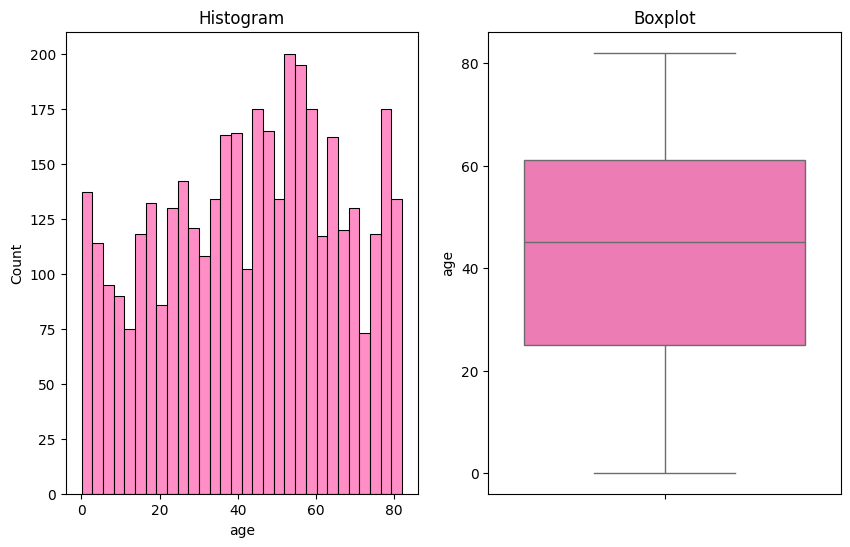


age - After Capping


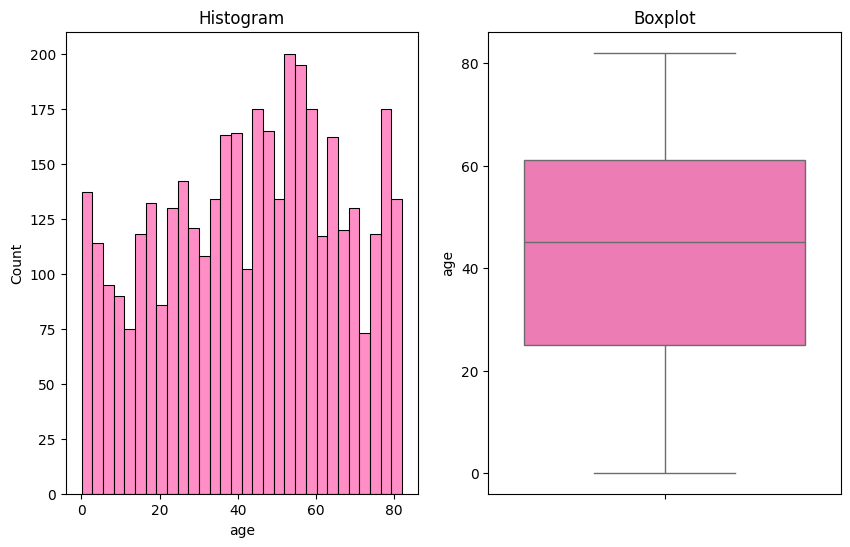

avg_glucose_level - Before Capping


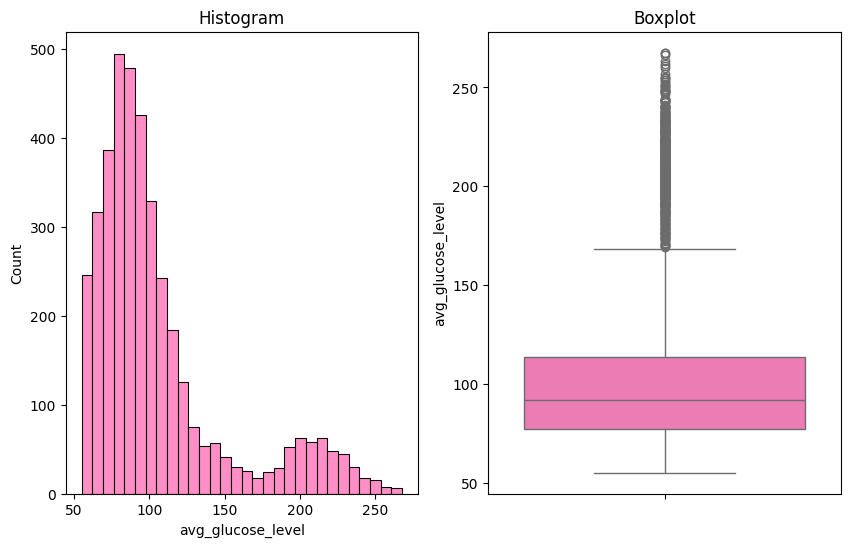


avg_glucose_level - After Capping


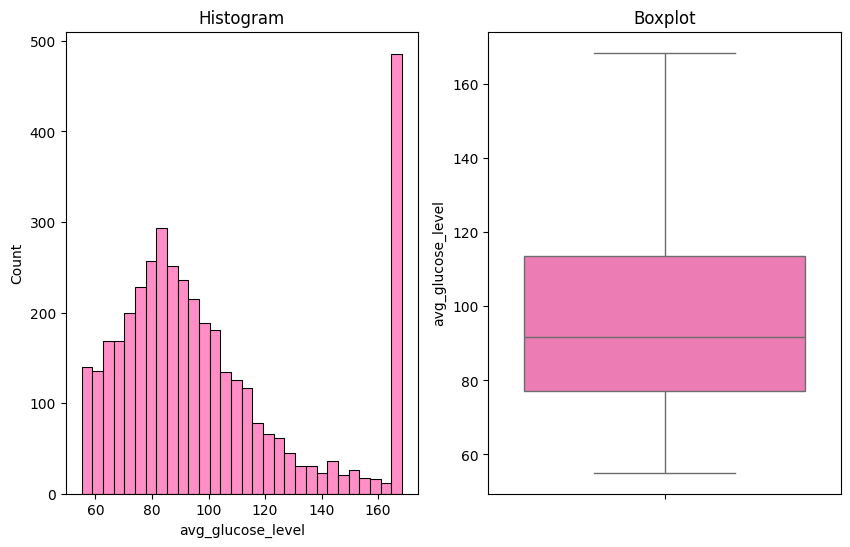

bmi - Before Capping


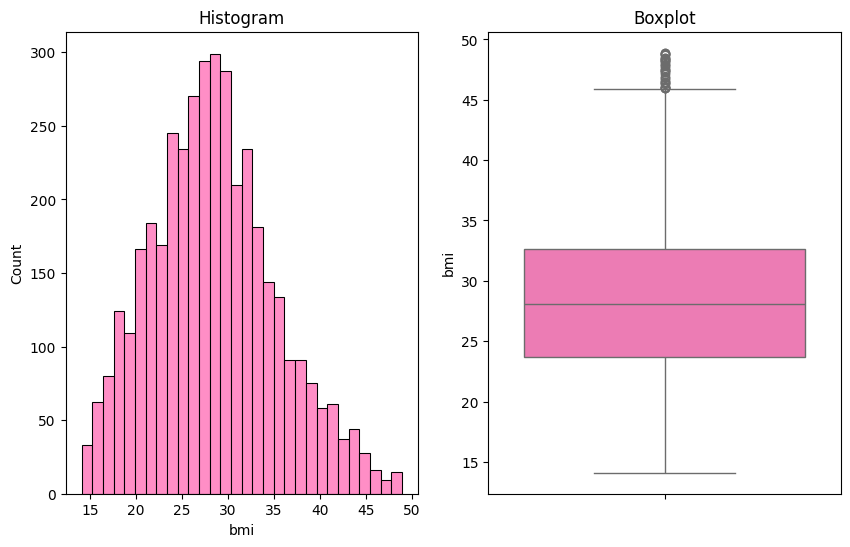


bmi - After Capping


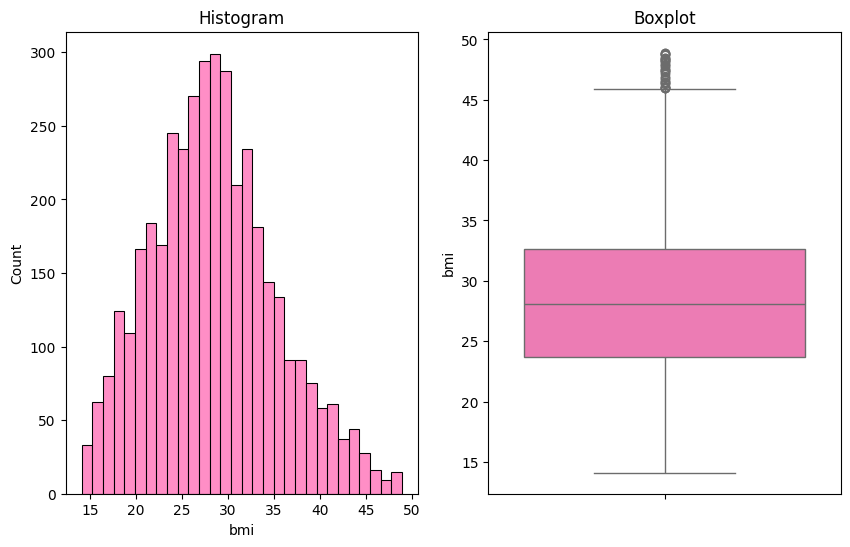

In [30]:
for col in num_cols:
  print(f'{col} - Before Capping')
  diagnostic_plots(X_train, col)

  print(f'\n{col} - After Capping')
  diagnostic_plots(X_train_capped, col)

## Handling Missing Values

After that, we will be checking the presence of null value in our data set. It can be seen that the features have no null values. We also skip the section where we determine the type of the missing values as none is present.

In [31]:
#Finding Missing Values in X_train_capped

null_values = X_train_capped.isnull()
null_count = null_values.sum()
print(null_count)

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
dtype: int64


In [32]:
#Finding Missing Values in X_test_capped

null_values = X_test_capped.isnull()
null_count = null_values.sum()
print(null_count)


gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
dtype: int64


In [33]:
#Finding Missing Values in y_train

null_values = y_train.isnull()
null_count = null_values.sum()
print(null_count)


0


In [34]:
#Finding Missing Values in y_test

null_values = y_test.isnull()
null_count = null_values.sum()
print(null_count)

0


Despite not having missing values, the column 'smoking_status; in this data set contains the value 'Unknown'. The smoking status column should describe the smoking background of the patients, but it will be harder for the algorithm to generalize new data if there are a lot of people classified as 'Unknown'.

Moreover, the amount of data with the value 'Unknown' for the smoking status is quite significant (1500 rows with 1210 unknown in X_train and 290 unknown in X_test). As the number is large, we try to minimize the amount of rows with the unknown value and investigate if there are any specific pattern or relation with other columns

In [35]:
unknown_rows_train = X_train_capped[(X_train_capped['smoking_status'] == 'Unknown')]
num_unknown_train = len(unknown_rows_train)
num_unknown_train

1210

In [36]:
unknown_rows_test = X_test_capped[(X_test_capped['smoking_status'] == 'Unknown')]
num_unknown_test = len(unknown_rows_test)
num_unknown_test

290

After conducting exploratory data analysis (EDA), we observed a wide age range in our dataset, spanning from children to the elderly. Upon further investigation, we found a notable number of underage participants in both the X_train and X_test datasets, totaling 546 and 115, respectively, whose smoking status was labeled as unknown. Given that these underage individuals are not legally permitted to smoke, we can reasonably infer that the unknown status for these participants actually signifies 'never smoked'.

In [37]:
unknown_rows_below_18_train = X_train_capped[(X_train_capped['smoking_status'] == 'Unknown') & (X_train_capped['age'] < 18)]
num_unknown_below_18_train = len(unknown_rows_below_18_train)
num_unknown_below_18_train

546

In [38]:
unknown_rows_below_18_test = X_test_capped[(X_test_capped['smoking_status'] == 'Unknown') & (X_test_capped['age'] < 18)]
num_unknown_below_18_test = len(unknown_rows_below_18_test)
num_unknown_below_18_test

115

In [39]:
X_train_capped.loc[X_train_capped['age'] < 18, 'smoking_status'] ='never smoked'
X_test_capped.loc[X_test_capped['age'] < 18, 'smoking_status'] ='never smoked'

After that we re-check the presence of 'Unknown' in the smoking status for participant under the age of 18. We can see that we successfully change the value into never smoked.

In [40]:
unknown_rows_below_18_train = X_train_capped[(X_train_capped['smoking_status'] == 'Unknown') & (X_train_capped['age'] < 18)]
num_unknown_below_18_train = len(unknown_rows_below_18_train)
num_unknown_below_18_train

0

In [41]:
unknown_rows_below_18_test = X_test_capped[(X_test_capped['smoking_status'] == 'Unknown') & (X_test_capped['age'] < 18)]
num_unknown_below_18_test = len(unknown_rows_below_18_test)
num_unknown_below_18_test

0

We define X_train_capped as X_train and X_test_capped as X_test so we can refer it as X_train and X_test for better readibility.

In [42]:
X_train = X_train_capped
X_test = X_test_capped

## Feature Selection

In order to determine which features will be included in our model, we conduct feature importance analysis to see which top 10 features are the most relevant to successfully classify whether someone might have brain stroke or not. To do that, we will be using XGB classifier. Before that, we need to do encoding for the categorical features.

The result showed that the most relevant features are age, marriage status, smoking status, work type, heart disease and hypertension history, as well as average glucose level.

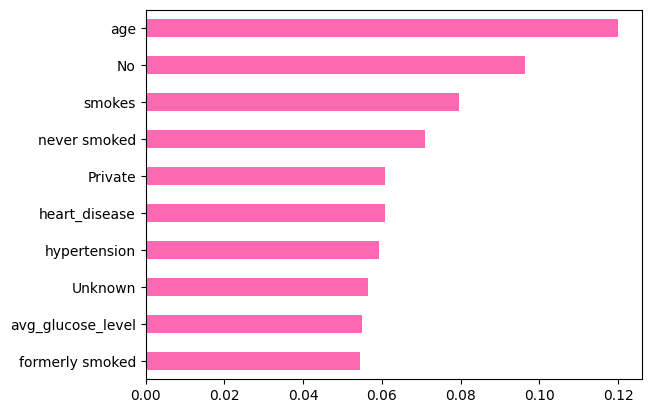

In [43]:
# fit model on training data
model = XGBClassifier()
X_train_ohe = pd.get_dummies(X_train, prefix='', prefix_sep='', columns=['gender', 'work_type', 'Residence_type', 'smoking_status', 'ever_married'])
y_train_ohe = y_train.copy()
model.fit(X_train_ohe, y_train_ohe)

# calculate feature importances
feat_importances = pd.Series(model.feature_importances_, index=X_train_ohe.columns)

# plot the top 10 most important features
feat_importances.nlargest(10).plot(kind='barh', color = 'hotpink').invert_yaxis()
plt.show()


### Creating new variables to store only the correlated features

As the result of our feature engineering, the classification model will feature:
'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'avg_glucose_level', 'smoking_status'


In [44]:
#Create new variables to store the relevant features

selected_columns = ['age', 'hypertension', 'heart_disease', 'ever_married',
                    'work_type', 'avg_glucose_level', 'smoking_status']

In [45]:
#Assign variables again based on the relevant features
X_train = X_train[selected_columns]
X_test = X_test[selected_columns]

In [46]:
# Checking the data
X_train

,age,hypertension,heart_disease,ever_married,work_type,avg_glucose_level,smoking_status
4739,37.0,0,0,No,Private,118.41000,never smoked
1035,52.0,0,0,Yes,Govt_job,86.06000,formerly smoked
492,52.0,0,0,Yes,Private,168.42625,Unknown
3051,44.0,0,0,Yes,Private,86.15000,never smoked
4383,61.0,0,0,Yes,Private,97.58000,formerly smoked
...,...,...,...,...,...,...,...
2998,76.0,1,0,Yes,Self-employed,168.42625,formerly smoked
1993,42.0,0,0,Yes,Govt_job,65.66000,never smoked
1064,71.0,0,0,Yes,Private,90.55000,formerly smoked
4838,23.0,0,0,No,Private,168.42625,smokes


# Modelling


### SMOTE

Because our data is imbalanced, we have to conduct data balancing using SMOTE. SMOTE is one of the oversampling data balancing techniques and it works by making the minority class more prominent, the model can better learn to distinguish between the classes. We use SMOTENC in this case as our features stil contain categorical feature.

Ideally, we want to apply SMOTE after encoding and scaling and right after modelling. However, we cannot include the SMOTE within our model pipeline as it might interfere with the predicting process of the X_test and y_test, as SMOTE is only allowed to be fitted in X_train.

In [47]:
# Oversampling with SMOTENC

smote = SMOTENC(random_state=42, categorical_features=[3, 4, 6])
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
y_train_resampled.value_counts()

stroke
0    3784
1    3784
Name: count, dtype: int64

### Scaling

The numerical features will be scaled using StandardScaler(). The StandardScaler is deemed suitable for this project because StandardScaler is designed for algorithms that are sensitive to feature scaling, which in this case would be KNN and SVM. As for models, such as Decision Tree, they are not sensitive to feature scaling but StandardScaler can still accomodate the scaling process for these algorithm.

### Encoding

The categorical features will be encoded using OrdinalEncoder for the smoking_status column as it has an instrinsic ordinal, starting from unknown, never smoked, formely smoked, and smokes.

### **Preprocessor pipeline**

The preprocessing steps for this project would consist of Standard scaler for the numerical features, ordinal encoder for the categorical features with intrinsict ordering (smoking_status starting from 'Unknown', 'never smoked', 'formerly smoked', 'smokes'), and one hot encoder for categorical columns with low cardinality and no intrinsict ordering

In [48]:
# Using columntransformer to create preprocessor pipeline
selected_num_columns = ['age', 'hypertension', 'heart_disease', 'avg_glucose_level'] 
selected_ordinal_columns = ['smoking_status']
selected_ohe_columns = ['ever_married', 'work_type']        


preprocessor = ColumnTransformer(
    transformers=[
        ('numeric', StandardScaler(), selected_num_columns),
        ('onehot', OneHotEncoder(), selected_ohe_columns),  # Apply OneHotEncoder
        ('ordinal', OrdinalEncoder(categories=[['Unknown', 'never smoked', 'formerly smoked', 'smokes']]), selected_ordinal_columns)  # Apply OrdinalEncoder
    ],
    remainder='passthrough'  # Passthrough other columns not specified
)

### Creating Pipelines For The Model With Default Hyperparameters

The model that will be used in this project are KNN, SVM, Decision Tree, Random Forest, and XGBoost. After defining the model, we train the models using the X_train_final and y_train, then we predict the X_test using the model to get y_pred_(modelname). After that, we compare the model evaluation with other models to find the best model for this dataset. 

The metric used in the model evaluation is recall. Recall measures the proportion of actual positive cases correctly identified by the model. Simply put, it calculate of all the actual positive instances, how many were correctly predicted by the model. If we concentrate on cases where the model predicts brain stroke among individuals, recall informs us of the percentage of these cases that were successfully identified by the model or how many of the individuals who truly have brain stroke were correctly detected? The opposite of precision, recall is used when avoiding false negative is more important than false positive. For health-related predictions, it is extremely dangerous to diagnose ill people as healthy because they can not get the treatment or prevention that they needed and might cause a bigger problem when a disease or potency to get a disease is not treated as soon as possible. 

In [49]:
# Making a pipeline for KNN

pipe_knn = make_pipeline(preprocessor, KNeighborsClassifier())
pipe_knn.fit(X_train_resampled, y_train_resampled)

print('Pipeline steps : ', pipe_knn.steps)

# Making a pipeline for SVM

pipe_svm = make_pipeline(preprocessor, SVC(random_state=42))
pipe_svm.fit(X_train_resampled, y_train_resampled)

print('Pipeline steps : ', pipe_svm.steps)

# Making a pipeline for Decision Tree

pipe_dt = make_pipeline(preprocessor, DecisionTreeClassifier(random_state=42))
pipe_dt.fit(X_train_resampled, y_train_resampled)

print('Pipeline steps : ', pipe_dt.steps)

# Making a  pipeline for Random Forest
pipe_rf = make_pipeline(preprocessor, RandomForestClassifier(random_state=42))
pipe_rf.fit(X_train_resampled, y_train_resampled)

print('Pipeline steps : ', pipe_rf.steps)

#Making pipeline for XGBoost
pipe_xgb = make_pipeline(preprocessor, XGBClassifier(random_state=42))
pipe_xgb.fit(X_train_resampled, y_train_resampled)

print('Pipeline steps : ', pipe_xgb.steps)

Pipeline steps :  [('columntransformer', ColumnTransformer(remainder='passthrough',
                  transformers=[('numeric', StandardScaler(),
                                 ['age', 'hypertension', 'heart_disease',
                                  'avg_glucose_level']),
                                ('onehot', OneHotEncoder(),
                                 ['ever_married', 'work_type']),
                                ('ordinal',
                                 OrdinalEncoder(categories=[['Unknown',
                                                             'never smoked',
                                                             'formerly smoked',
                                                             'smokes']]),
                                 ['smoking_status'])])), ('kneighborsclassifier', KNeighborsClassifier())]


Pipeline steps :  [('columntransformer', ColumnTransformer(remainder='passthrough',
                  transformers=[('numeric', StandardScaler(),
                                 ['age', 'hypertension', 'heart_disease',
                                  'avg_glucose_level']),
                                ('onehot', OneHotEncoder(),
                                 ['ever_married', 'work_type']),
                                ('ordinal',
                                 OrdinalEncoder(categories=[['Unknown',
                                                             'never smoked',
                                                             'formerly smoked',
                                                             'smokes']]),
                                 ['smoking_status'])])), ('svc', SVC(random_state=42))]
Pipeline steps :  [('columntransformer', ColumnTransformer(remainder='passthrough',
                  transformers=[('numeric', StandardScaler(),
                 

# Cross Validation

The cross-validation score is a metric used to evaluate the performance of a machine learning model. It's computed by splitting the dataset into multiple subsets (folds), training the model on some of these subsets, and then evaluating its performance on the remaining subsets. This process is repeated multiple times, with each subset serving as both a training and a testing set.

For this case, as we have multiple models, we conduct cross validation with recall score as the evaluation metric. In general, all models are stable as there are no model with particular high standard deviation and the mean match the actual recall score, which will be presented in a table in the next section.

In [50]:
#Cross Validation for KNN

recall_train_cross_val = cross_val_score(pipe_knn,
                                     X_train_resampled,
                                     y_train_resampled,
                                     cv=3,
                                     scoring="recall")

print('Recall Score - All - Cross Validation  : ', recall_train_cross_val)
print('Recall Score - Mean - Cross Validation : ', recall_train_cross_val.mean())
print('Recall Score - Std - Cross Validation  : ', recall_train_cross_val.std())
print('Recall Score - Range of Test-Set       : ', (recall_train_cross_val.mean()-recall_train_cross_val.std()) , '-', (recall_train_cross_val.mean()+recall_train_cross_val.std()))

Recall Score - All - Cross Validation  :  [0.90563045 0.96434231 0.95400476]
Recall Score - Mean - Cross Validation :  0.941325841312771
Recall Score - Std - Cross Validation  :  0.025590843111100155
Recall Score - Range of Test-Set       :  0.9157349982016708 - 0.9669166844238711


In [51]:
#Cross Validation for SVM

recall_train_cross_val = cross_val_score(pipe_svm,
                                     X_train_resampled,
                                     y_train_resampled,
                                     cv=3,
                                     scoring="recall")

print('Recall Score - All - Cross Validation  : ', recall_train_cross_val)
print('Recall Score - Mean - Cross Validation : ', recall_train_cross_val.mean())
print('Recall Score - Std - Cross Validation  : ', recall_train_cross_val.std())
print('Recall Score - Range of Test-Set       : ', (recall_train_cross_val.mean()-recall_train_cross_val.std()) , '-', (recall_train_cross_val.mean()+recall_train_cross_val.std()))

Recall Score - All - Cross Validation  :  [0.8406027  0.90649762 0.91673275]
Recall Score - Mean - Cross Validation :  0.8879443569593389
Recall Score - Std - Cross Validation  :  0.03373538294475432
Recall Score - Range of Test-Set       :  0.8542089740145846 - 0.9216797399040932


In [52]:
#Cross Validation for Decision Tree

recall_train_cross_val = cross_val_score(pipe_dt,
                                     X_train_resampled,
                                     y_train_resampled,
                                     cv=3,
                                     scoring="recall")

print('Recall Score - All - Cross Validation  : ', recall_train_cross_val)
print('Recall Score - Mean - Cross Validation : ', recall_train_cross_val.mean())
print('Recall Score - Std - Cross Validation  : ', recall_train_cross_val.std())
print('Recall Score - Range of Test-Set       : ', (recall_train_cross_val.mean()-recall_train_cross_val.std()) , '-', (recall_train_cross_val.mean()+recall_train_cross_val.std()))

Recall Score - All - Cross Validation  :  [0.85884219 0.92234548 0.91038858]
Recall Score - Mean - Cross Validation :  0.8971920841968385
Recall Score - Std - Cross Validation  :  0.02755331489753366
Recall Score - Range of Test-Set       :  0.8696387692993048 - 0.9247453990943721


In [53]:
#Cross Validation for Random Forest

recall_train_cross_val = cross_val_score(pipe_rf,
                                     X_train_resampled,
                                     y_train_resampled,
                                     cv=3,
                                     scoring="recall")

print('Recall Score - All - Cross Validation  : ', recall_train_cross_val)
print('Recall Score - Mean - Cross Validation : ', recall_train_cross_val.mean())
print('Recall Score - Std - Cross Validation  : ', recall_train_cross_val.std())
print('Recall Score - Range of Test-Set       : ', (recall_train_cross_val.mean()-recall_train_cross_val.std()) , '-', (recall_train_cross_val.mean()+recall_train_cross_val.std()))

Recall Score - All - Cross Validation  :  [0.87470262 0.95007924 0.93814433]
Recall Score - Mean - Cross Validation :  0.9209753953900867
Recall Score - Std - Cross Validation  :  0.033080588795860504
Recall Score - Range of Test-Set       :  0.8878948065942261 - 0.9540559841859472


In [54]:
#Cross Validation for XGB

recall_train_cross_val = cross_val_score(pipe_xgb,
                                     X_train_resampled,
                                     y_train_resampled,
                                     cv=3,
                                     scoring="recall")

print('Recall Score - All - Cross Validation  : ', recall_train_cross_val)
print('Recall Score - Mean - Cross Validation : ', recall_train_cross_val.mean())
print('Recall Score - Std - Cross Validation  : ', recall_train_cross_val.std())
print('Recall Score - Range of Test-Set       : ', (recall_train_cross_val.mean()-recall_train_cross_val.std()) , '-', (recall_train_cross_val.mean()+recall_train_cross_val.std()))

Recall Score - All - Cross Validation  :  [0.88342585 0.95958796 0.96748612]
Recall Score - Mean - Cross Validation :  0.9368333100831018
Recall Score - Std - Cross Validation  :  0.037902178062213715
Recall Score - Range of Test-Set       :  0.898931132020888 - 0.9747354881453155


# Model Evaluation
## Summary of Recall Score of All Models

After the models have been defined, we predict the y_train and y_test using each model and find the corresponding recall score for each default model. In short, all models are facing overfitting issues. However, overfitting is expected as we used oversampling data balancing (SMOTENC), which caused the data to overfit as the model will learn to predict the training set more easily. The data imbalance was in 5:95 ratio, which is extremely big causing the oversampling to generate over 4400 data. This repetition of extremely similar minority class instances can lead to the model memorizing the training data, especially when using simple algorithms like k-nearest neighbors (KNN) or decision trees. As a result, the model may not generalize well to unseen data, leading to overfitting.

The result of the recall score calculation for both train and test set for each model is summarized below.

For KNN, the model is overfitting by alot with recall score of 0.96 and 0.52 for training and testing test respectively.  This difference is considered too high and we will not proceed with KNN

The SVM model has the same overfitting issues, however, the distance between train and test recall score is not as far as the other model, thus making SVM the best model with default parameter and will undergo hyperparameter tuning with a goal to reduce this overfitting issue.

As explained before, decision tree is prone to overfitting when mixed with SMOTENC. And as we can see, the train and test recall are 0.99 and 0.29 respectively.

For random forest, since it is a derivative of decision tree with the addition of bagging, random forest is expected to be slightly better than decision tree. However, the difference between train recall (0.99) and test recall (0.31) is still too high

Lastly, XGBoost classifier trains decision trees sequentially, combining predictions from multiple weak learners to make a final prediction. It employs gradient-based optimization, regularization, and tree pruning. The addition of boosting ensemble learning also aims to reduce overfitting and increase performace. However, we can see that the model is still overfitting by a lot, even though it is better compared to decision tree and random forest (0.97 and 0.33)

In conclusion, __SVM is considered as our best model__ as the recall score is relatively high and it is the least overfitting algorithm.

In [55]:
# Define models
models = {
    'kNN': pipe_knn,
    'SVM': pipe_svm,
    'Decision Tree' : pipe_dt,
    'Random Forest' : pipe_rf,
    'XGBoost' : pipe_xgb
}

# Initialize DataFrame to store F1 scores for training and testing
df_model = pd.DataFrame(columns=models.keys(), index=['Training Recall Score', 'Testing Recall Score'])

# Loop over models to calculate F1 scores for both training and testing
for model_name, model in models.items():
    # Calculate F1 score for training data
    y_train_pred = model.predict(X_train_resampled)
    training_recall = recall_score(y_train_resampled, y_train_pred)
    
    # Calculate recall score for testing data
    y_test_pred = model.predict(X_test)
    testing_recall = recall_score(y_test, y_test_pred)
    
    # Store recall scores in DataFrame
    df_model.loc['Training Recall Score', model_name] = training_recall
    df_model.loc['Testing Recall Score', model_name] = testing_recall

df_model

,kNN,SVM,Decision Tree,Random Forest,XGBoost
Training Recall Score,0.965381,0.895085,0.997093,0.998414,0.979915
Testing Recall Score,0.520833,0.583333,0.291667,0.3125,0.333333


## Model Optimization

As we discussed earlier, SVM model resulted in a model with the least severe overfitting issues. Therefore, we will conduct hyperparameter tuning using grid search for the SVM model to reduce the overfitting.

__SVM__

In [56]:
# Define the parameter grid 
scorer = make_scorer(recall_score) # We want the scoring to be based on recall score
param_grid_svm = {
    'svc__C': [900, 1000, 1100],
    'svc__gamma': [0.009, 0.01, 0.011],
    'svc__kernel': ['rbf']
}

# Initialize GridSearchCV
grid_search = GridSearchCV(pipe_svm, param_grid=param_grid_svm, cv=2, scoring=scorer).fit(X_train_resampled, y_train_resampled)

In [57]:
# Show the best parameter
best_param_svm = grid_search.best_params_
print(best_param_svm)
print('\n')
# Show the best estimator
best_pipe_svm = grid_search.best_estimator_
print(best_pipe_svm)
#Creating dataframe
print('\n')
result_df_svm = pd.DataFrame.from_dict(grid_search.cv_results_, orient='columns')
print(result_df_svm.columns)

{'svc__C': 1000, 'svc__gamma': 0.011, 'svc__kernel': 'rbf'}


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('numeric', StandardScaler(),
                                                  ['age', 'hypertension',
                                                   'heart_disease',
                                                   'avg_glucose_level']),
                                                 ('onehot', OneHotEncoder(),
                                                  ['ever_married',
                                                   'work_type']),
                                                 ('ordinal',
                                                  OrdinalEncoder(categories=[['Unknown',
                                                                              'never '
                                                                              'smoked',
          

In [58]:
y_pred_train_bestsvm = best_pipe_svm.predict(X_train_resampled)
y_pred_test_bestsvm = best_pipe_svm.predict(X_test)

In [59]:
print(classification_report(y_train_resampled, y_pred_train_bestsvm))
print(classification_report(y_test, y_pred_test_bestsvm))

              precision    recall  f1-score   support

           0       0.87      0.77      0.82      3784
           1       0.79      0.89      0.84      3784

    accuracy                           0.83      7568
   macro avg       0.83      0.83      0.83      7568
weighted avg       0.83      0.83      0.83      7568

              precision    recall  f1-score   support

           0       0.98      0.75      0.85       949
           1       0.11      0.62      0.19        48

    accuracy                           0.75       997
   macro avg       0.54      0.69      0.52       997
weighted avg       0.93      0.75      0.82       997



The cross validation is acceptable as the average recall score for the train set in this close validation is similar to the recall score on the classification report and the standard deviation between CVs are relatively small.

In [60]:
#Cross Validation for SVM

recall_train_cross_val = cross_val_score(best_pipe_svm,
                                     X_train_resampled,
                                     y_train_resampled,
                                     cv=3,
                                     scoring="recall")

print('Recall Score - All - Cross Validation  : ', recall_train_cross_val)
print('Recall Score - Mean - Cross Validation : ', recall_train_cross_val.mean())
print('Recall Score - Std - Cross Validation  : ', recall_train_cross_val.std())
print('Recall Score - Range of Test-Set       : ', (recall_train_cross_val.mean()-recall_train_cross_val.std()) , '-', (recall_train_cross_val.mean()+recall_train_cross_val.std()))

Recall Score - All - Cross Validation  :  [0.85487708 0.90808241 0.90404441]
Recall Score - Mean - Cross Validation :  0.8890012999183519
Recall Score - Std - Cross Validation  :  0.024185712904766017
Recall Score - Range of Test-Set       :  0.8648155870135859 - 0.9131870128231179


## Comparison Between Default And Tuned SVM

After applying hyperparameter tuning using grid search, we were able to reduce the overfitting issues significantly as seen from the table below. There is an increase in the test recall score from 0.58 to 0.63. **Out of every model tested in this project, Tuned SVM yield the better result in terms of fit**

However, as the model is related to health-related predictions, such recall score is still deemed lacking there are still room for improvement for the models, which will be discussed in the conlusion section.

In [61]:
# Define the tuned model
models = {
    'SVM': pipe_svm,
    'Tuned SVM': best_pipe_svm
}

# Define the metrics
metrics = {
    'Recall Score': recall_score
}

# Initialize DataFrame to store recall scores for training and testing
model_tuning = pd.DataFrame(columns=models.keys(), index=['Training Recall Score', 'Testing Recall Score'])

# Loop over metrics and models to calculate recall scores for both training and testing
for metric in metrics.keys():
    for model_name, model in models.items():
        # Calculate recall score for training data
        y_train_pred = model.predict(X_train_resampled)
        training_recall = metrics[metric](y_train_resampled, y_train_pred)
        
        # Calculate recall score for testing data
        y_test_pred = model.predict(X_test)
        testing_recall = metrics[metric](y_test, y_test_pred)
        
        # Store recall scores in DataFrame
        model_tuning.loc['Training Recall Score', model_name] = training_recall
        model_tuning.loc['Testing Recall Score', model_name] = testing_recall

model_tuning

,SVM,Tuned SVM
Training Recall Score,0.895085,0.890063
Testing Recall Score,0.583333,0.625


# Model Saving

We save the best model, which is tuned SVM and we will try to use it with a new and randomized data in the inference notebook.

In [62]:
pickle.dump(best_pipe_svm, open('model_svm_tuned.pkl', 'wb'))

# Conceptual Problems

### **1. Bagging: Why we use it and how it works?**

Bagging, or Bootstrap Aggregating, is a machine learning ensemble meta-algorithm designed to improve the stability and accuracy of machine learning algorithms. Bagging is often used when dealing with high variance algorithms, such as decision trees, which tend to overfit the training data.

We conduct bagging to reduce variance and prevent overfitting in predictive modeling. Overfitting occurs when a model learns the noise in the training data rather than the underlying patterns, leading to poor generalization to unseen data. Bagging works by training multiple instances of a base learning algorithm on different subsets of the training data and then combining their predictions.

How Bagging Works:

Bootstrap Sampling: Bagging starts by creating multiple bootstrap samples from the original training data. Bootstrap sampling involves randomly selecting samples from the training dataset with replacement. This means that some instances may be selected multiple times, while others may not be selected at all.

Training Base Learners: Once the bootstrap samples are created, a base learning algorithm will be trained on each bootstrap sample. Since each sample is randomized due to the bootstrap sampling, the base learners trained on these samples will also be different.

Combining Predictions: After training the base learners, bagging combines their predictions to make a final prediction. For regression tasks, the final prediction is often the average (or median) of the predictions made by individual base learners. For classification tasks, the final prediction can be determined by majority voting.

### **2. Random Forest VS XGBoost**

Random Forest constructs multiple decision trees during training and outputs the mode of the classes (classification) or mean prediction (regression) of the individual trees. It employs bagging and feature randomness to ensure diversity and robustness. Each tree in Random Forest is trained independently on a random subset of the training data (bootstrapped samples) with a random subset of features considered for splitting at each node.

XGBoost is an implementation of gradient boosting decision trees designed for speed and performance. It sequentially builds decision trees, with each subsequent tree correcting the errors made by the previous ones using gradient descent. XGBoost trains decision trees sequentially, combining predictions from multiple weak learners to make a final prediction. It employs gradient-based optimization, regularization, and tree pruning to improve performance and prevent overfitting.


### **3. Cross Validation**


Cross-validation serves as a robust technique to estimate model performance on unseen data. Its benefits include systematically creating and evaluating multiple models on various subsets of the dataset. By providing performance measurements such as mean and standard deviation, cross-validation offers insights into how well the model performs on average and the expected variability in its performance. The mean represents the average effectiveness of the procedure, while the standard deviation indicates the extent to which the procedure's performance is likely to vary in practice. Simply put, cross validation score represents a model stability in predicting data.

The steps of cross-validation involve randomly splitting the entire training set into k number of folds (subsets). For each fold in the training set, the model is built on k–1 folds and then tested against the validation set to assess its effectiveness. This process repeats until each of the k-folds has served as the validation set. Finally, the average of the k accuracies obtained serves as the Cross-Validation accuracy, providing a robust performance metric for the model.

Additionally, cross-validation aids in detecting potential issues like overfitting or underfitting by evaluating the model's performance across multiple subsets of the data, thereby enhancing the model's generalization capability. 


# Conclusion

## EDA Analysis
- The dataset contains the occurence of brain stroke among patients based on several health and life-style indicators
- The dataset is characterized by a significant class imbalance, with instances of individuals who suffered from a brain stroke constituting only 5% of the data.
- The ratio of stroke patients to non-stroke patients is higher among individuals with heart diseases and hypertension.
- Married status, working in a private sector, and being a regular smoker also caused in higher ratio of stroke patients to non-stroke patients
- Residence type does not show any trend related to stroke.
- Normal distribution for age
- Positively skewed distributions for average glucose level, mostly low to medium glucose level
- Stroke becomes an issue only for people with older age (above 50 years old)
- Having high glucose level increased the likelihood of brain stroe, however old people with low glucose level can still have brain stroke.
- BMI does not really affect the likelihood of strokes
- Married patients are on their reproductive age.


## Overal Analysis
The objective of this project is to create a machine learning with kNN, SVM, Decision Tree, Random Forest, and XGBoost models to predict individuals' probability to get brain stroke using a given set of features. The raw data is loaded, cleaned, and EDA was done to get an overview of the data. Then, the data is split into X_train, X_test, y_train, and y_test. Then, we will conduct feature engineering, which include handling outliers and missing values, feature selections, data balancing, scaling, as well as encoding. The outlier in the features were handled using Winsorizer and there were no missing values, but there are some adjustment for the 'Unknown' value in the smoking type. After that, we conducted feature engineering using feature of importance method to determine the most relevant features and SMOTENC to balance the data as there are only 5% of the participant who actually got brain stroke. For the scaling method, Standard Scaler was used to scale the numerical features based on their means; whereas the categorical columns, we used OneHotEncoder for categorical features with no intrinsict ordering and low cardinality and OrdinalEncoder for columns with specific ordering. Then, the models with their default hyperparameters were initialized using pipelines and trained using the train set. The prediction result of the train and test set were evaluated using recall score. The evaluation demonstrated that SVM performed better than the rest of the model. Although the tree-based models produced a higher recall for the train set, these models overfitted as their test recall is significantly smaller than the respective train set. As for the SVM, the difference in recall between train and test set is the least, severe one. Thus, we conduct hyperparameter tuning for the SVM model to improve the model and reduce the overfitting issues.

The tuned SVM model demonstrates superior effectiveness for hospitals to predict the possibility of brain stroke compared to other algorithms tested in this project. Although its goodness of fit is still overfitting, especially when we are applying the model for healt-related purposes, it still showed that there are room for improvement and SVM is the preffered model for this dataset. The overfitting issue relies on the fact that we conduct oversampling data balancing procedure. The ratio between sick and healthy people is too sparse, causing the SMOTENC to generate over 4400 data points based on only 250 available data points. This might cause the model to be able to learn the train set exceptionally well as there are over 4700 data with similar natures as they were generated by SMOTENC. In addition, SVM's drawback lies in its resource-intensive nature, with time and memory consumption increasing linearly with dataset size. 

We can still improve the model thrugh regular monitoring of model performance, feedback collection from users, improving the hyperparameter tuning by introducing new parameters, and updating the model with a new dataset for another time period. It is highly recommended to get new information related to sick patient and their characteristic so that the model can generalize unseen data more accurately, instead of over-learning the synthesized data points from the SMOTENC.

**Strength:** The tuned SVM model was shown to be the least overfitting model out of the five models created in this project with a decent recall score for both train and test test.

**Weakness:** Although the degree is less severe, as we are dealing with health-related problems, the tuned SVM is still overfitting. Moreover, SVM is more time and resource consuming compared to simpler methods, such as KNN or decision tree.


## Business Insights

- To get the least overfit model to predict brain stroke among individuals, health institution may create an SVM model with hyperparameter as follows: 'svc__C': 1000, 'svc__gamma': 0.011, 'svc__kernel': 'rbf'.  The model created with this hyperparameter resulted in the least overfitting model and a decent recall score score, which emphasize on both false negative. Recall is used as the main metric evaluation as it is dangerous for possibly ill people to be diagnosed as healthy, as it may prevent them from receiving the treatments or further medical procedure they needed.
- Despite having the best goodness of fit, SVM model is the most time and resource consuming model compared to the other options. If the company does not have sufficient resources to create an SVM model, logistic regression is a good alternative as the numerical column in this data set are mostly in normal distribution.
- As a company, we need to conduct continuous model monitoring, user feedback collection, and ongoing improvement efforts. This iterative approach ensures that the predictivehealth sector. Regular updates to the model based on new data and advancements in machine learning techniques can further enhance its predictive capabilities and reliability.

In conclusion, By understanding model performance, tuning parameters effectively, and adapting to evolving data landscapes, organizations can make more informed decisions and mitigate the occurence of stroke among tested individuals
